Model Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        80
           1       0.78      0.71      0.74        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143


Confusion Matrix:
[[67 13]
 [18 45]]


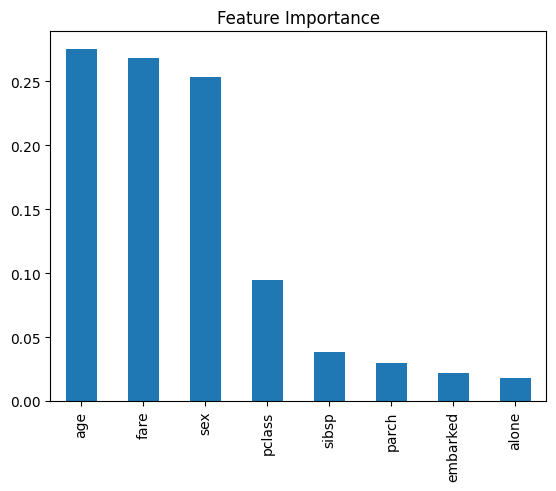

In [1]:
# STEP 1: Install & Import Required Libraries
!pip install seaborn scikit-learn pandas matplotlib

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 2: Load Dataset
titanic = sns.load_dataset('titanic')

# STEP 3: Data Preprocessing & Feature Selection
# Drop irrelevant columns and handle missing data
titanic.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1, inplace=True)
titanic.dropna(inplace=True)

# Convert categorical to numerical
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Feature Matrix and Target
X = titanic.drop(['survived'], axis=1)
y = titanic['survived']

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predictions & Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# STEP 7: Feature Importance (Optional Insight)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Feature Importance')
plt.show()
